In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

Nachylenie (a): 0.5999999999999999
Wyraz wolny (b): 2.200000000000003


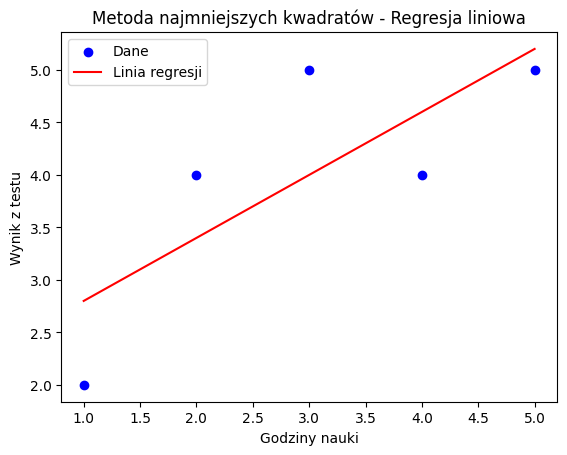

In [ ]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [ ]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

(np.float64(0.28284271247461895), np.float64(0.9380831519646857))

In [ ]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

np.float64(0.7745966692414834)

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


Nachylenie (a): 1.4744583187727707
Wyraz wolny (b): 0.5235056755455082


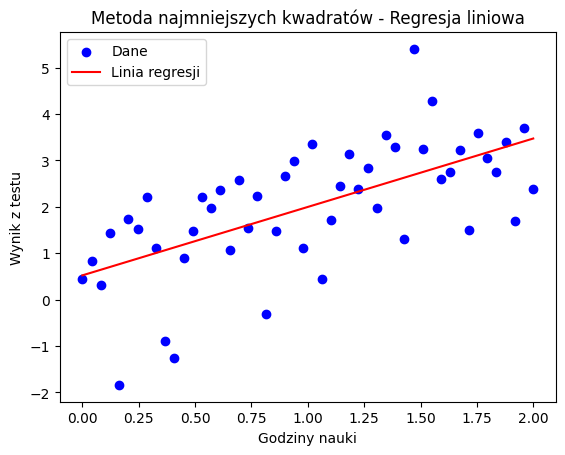

In [ ]:
x = np.linspace(0, 2, 50)
y = 2*x + np.random.normal(0, 1, 50)

X = np.vstack((x, np.ones(len(x)))).T
beta = np.linalg.inv(X.T @ X) @ X.T @ y
a, b = beta

result = stats.linregress(x, y)

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()


# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

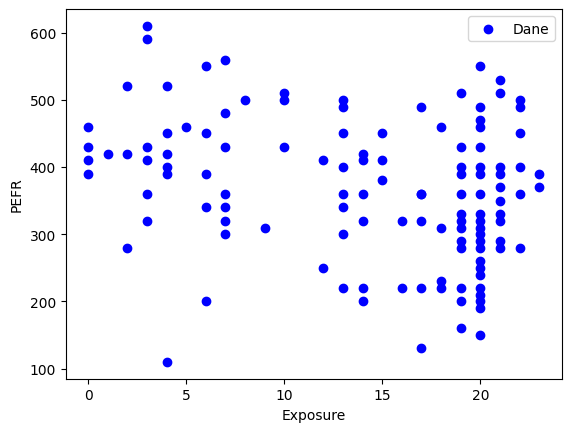

Współczynnik korelacji Pearsona (ręcznie): -0.27702170106840723
Współczynnik korelacji Pearsona (funkcja corrcoef): -0.2770217010684072
Nachylenie (a): -4.1845764854614425
Wyraz wolny (b): 424.582806573957


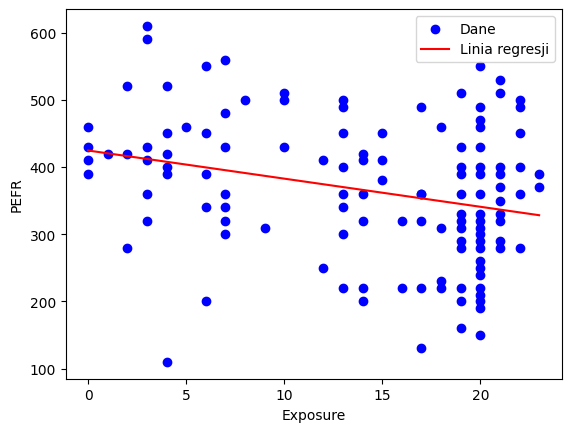

In [ ]:
data = pd.read_csv('LungDisease.csv')
x = data['Exposure']
y = data['PEFR']

plt.scatter(x, y, color='blue', label='Dane')
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.legend()
plt.show()

mean_x = np.mean(x)
mean_y = np.mean(y)
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

pearson_coefficient = cov_xy / (std_x * std_y)
print(f"Współczynnik korelacji Pearsona (ręcznie): {pearson_coefficient}")

pearson_coefficient = np.corrcoef(x, y)[0, 1]
print(f"Współczynnik korelacji Pearsona (funkcja corrcoef): {pearson_coefficient}")

reg = stats.linregress(x, y)
a = reg.slope
b = reg.intercept

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.legend()
plt.show()





# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



      x1     y1    x2    y2    x3     y3    x4     y4
1   10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
2    8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
3   13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
4    9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
5   11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
6   14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
7    6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
8    4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
9   12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
10   7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
11   5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89
Zestaw 1: a=0.500, b=3.000, r=0.816, std_err=0.118
Zestaw 2: a=0.500, b=3.001, r=0.816, std_err=0.118
Zestaw 3: a=0.500, b=3.002, r=0.816, std_err=0.118
Zestaw 4: a=0.500, b=3.002, r=0.817, std_err=0.118


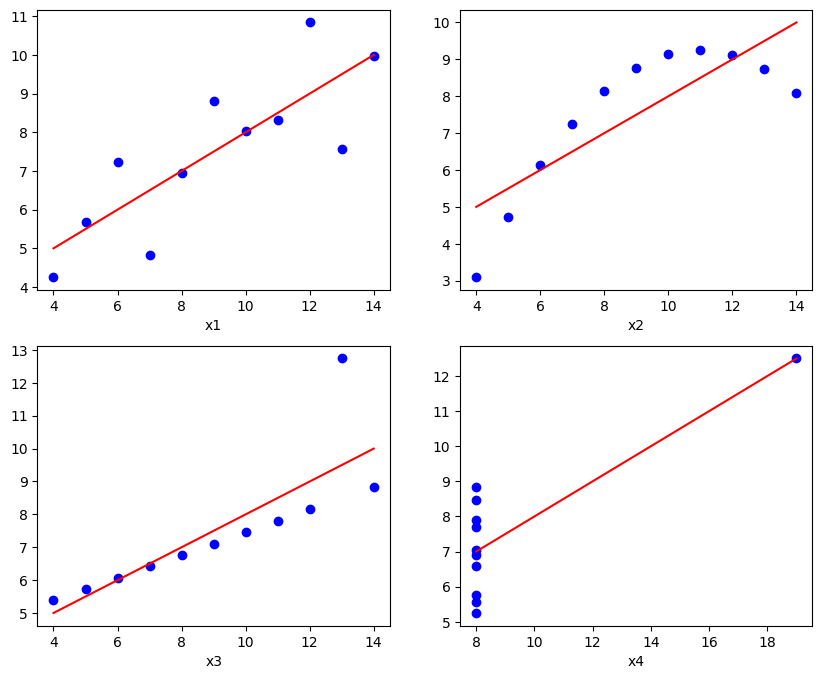

In [6]:
data = pd.read_csv('anscombe.csv')
data.columns = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']
data.drop(0, inplace=True)
print(data)

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
axes = ax.flatten()
for i, axis in enumerate(axes):
  this_data = pd.DataFrame({
    'x': data[data.columns[i*2]].astype(float),
    'y': data[data.columns[i*2+1]].astype(float)
  })

  this_data.sort_values(by='x', inplace=True)
  axis.scatter(this_data['x'], this_data['y'], color='blue', label='Dane')
  reg = stats.linregress(this_data['x'], this_data['y'])
  a = reg.slope
  b = reg.intercept
  axis.plot(this_data['x'], a * this_data['x'] + b, color='red', label='Linia regresji')
  axis.set_xlabel(data.columns[i*2])
  print(f"Zestaw {i+1}: a={reg.slope:.3f}, b={reg.intercept:.3f}, r={reg.rvalue:.3f}, std_err={reg.stderr:.3f}")


